In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import pandas as pd
import sympy as sym
import warnings
import pickle as plk
from IPython.display import display, Math
from numpy.lib.scimath import sqrt as csqrt

## Functions

In [3]:
def f(x):
    return np.cos(2*np.pi*3200*x) + 0.5*np.cos(2*np.pi*600*x) + 0.01*np.cos(2*np.pi*300*x)


def decimation(x,t,M):
    k = M-1
    xnew = []
    tnew = []
    
    for i in range(len(t)):
        k = k + 1
        if(k == M):
            xnew.append(x[i])
            tnew.append(t[i])
            k = 0
            
    return {'x':xnew,'t':tnew}


def interpolation(x,t,L):
    k = L-1

font = {'family':'serif', 'weight':'normal', 'size':20}
font2 = {'family':'serif', 'weight':'normal', 'size':15}
font3 = {'family':'serif', 'weight':'normal', 'size':10}

## Q1

C:\Users\Caio\AppData\Local\Temp\ipykernel_8656\3004338525.py:17: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  markerline, stemline, baseline = plt.stem(t1,x1,'red',label = 'Sampling')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

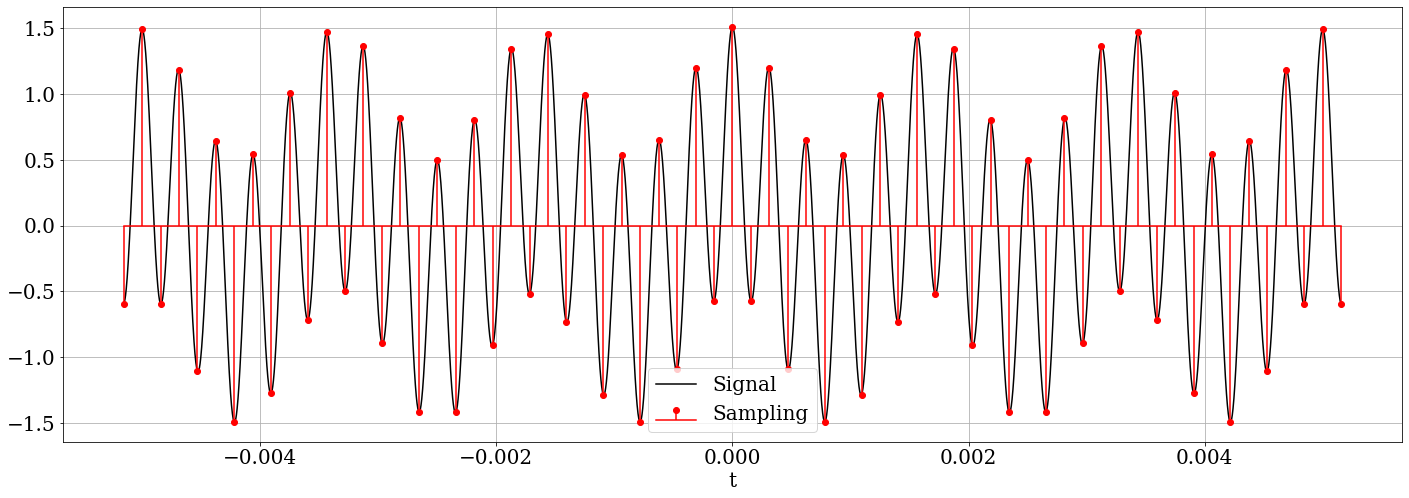

In [4]:
tlimits = [-33/6400,33/6400]

#tpoints = 1000
Fs = 3200*2
tpoints = int(np.floor((tlimits[1]-tlimits[0]) * Fs)) + 1

t1 = np.linspace(tlimits[0],tlimits[1],tpoints)
x1 = f(t1) # Sampled signal

t2 = np.linspace(tlimits[0],tlimits[1],100*tpoints)
x2 = f(t2) # Continuous signal

plt.figure(figsize=(24,8))
plt.rc('font',**font)
plt.grid(True)
plt.plot(t2,x2,'black', label = 'Signal')
markerline, stemline, baseline = plt.stem(t1,x1,'red',label = 'Sampling')
baseline.set_color('red')
markerline.set_color('red')
plt.xlabel("t")
plt.legend()

warnings.filterwarnings("ignore")

display(Math('F_{s} = %5.0f, ~~~~~ T_{s} = %5.6f ms' %(Fs, 1e3/Fs)))
display(Math('tPoints = %5.0f, ~~~~~ Time~period = %5.4f ms' %(tpoints,(tlimits[1]-tlimits[0])*1e3)))

## Q2

### Single reconstruction

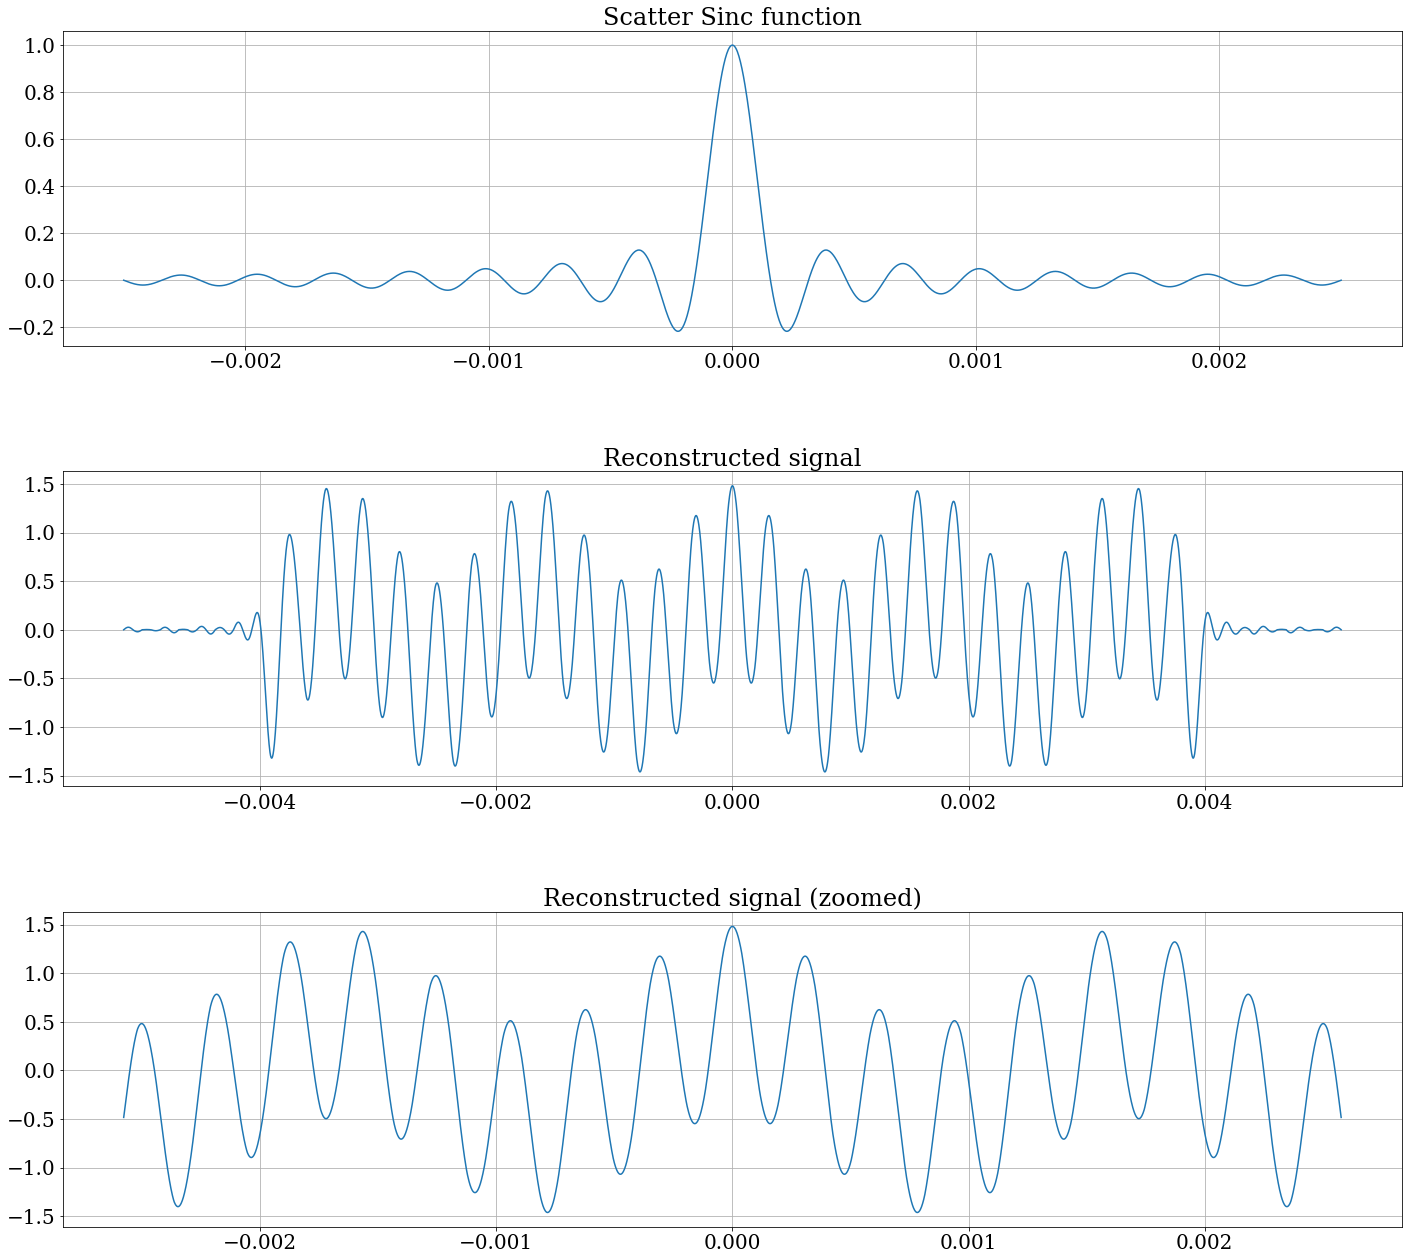

In [5]:
rIncrease = 2 # Range increase
hRange = 16 # Sinc range (in T)
hPoints = 1600 # Sinc points

figure,ax=plt.subplots(3, 1,figsize=(24,22))
plt.subplots_adjust(hspace=0.4)
plt.rc('font',**font)

increment = int((tlimits[1]-tlimits[0])*(rIncrease/2))
t1inc = np.linspace(tlimits[0]-increment, tlimits[1]+increment, rIncrease*tpoints)
x1inc = f(t1inc) # Sampled signal incremented

th = np.linspace(-hRange*(1/Fs),hRange*(1/Fs),hPoints)
h = np.sin(np.pi*th*Fs)/(np.pi*th*Fs)
ax[0].grid(True)
ax[0].set_title('Scatter Sinc function')
ax[0].plot(th,h)

totpoints = int(hPoints + (rIncrease*tpoints- 2*hRange - 1)*(hPoints)/(2*hRange))
tr = np.linspace(tlimits[0]-increment, tlimits[1]+increment ,totpoints)
xi = np.zeros(totpoints)
xr = np.zeros(totpoints)

for i in range(rIncrease*tpoints- 2*hRange):
    xi1 = int(i*(hPoints)/(2*hRange))           # Left limit of xi
    xi2 = int(hPoints + i*(hPoints)/(2*hRange)) # Right limit of xi
    #print('xi1={:.2f}, xi2={:.2f}, i={:.2f}, totpoints={:.2f}'.format(xi1,xi2,i,totpoints))
    xi = np.zeros(totpoints)
    xi[xi1:xi2] = x1inc[i+hRange]*h
    xr = xr + xi 

ax[1].grid(True)
ax[1].set_title('Reconstructed signal')
ax[1].plot(tr,xr)

dFactor = 2 # Decrement factor
decrement = int(totpoints/2 - totpoints/(2*dFactor))
x3 = xr[decrement : totpoints-decrement]
t3 = tr[decrement : totpoints-decrement]
ax[2].grid(True)
ax[2].set_title('Reconstructed signal (zoomed)')
ax[2].plot(t3,x3)

### Reconstruction comparison

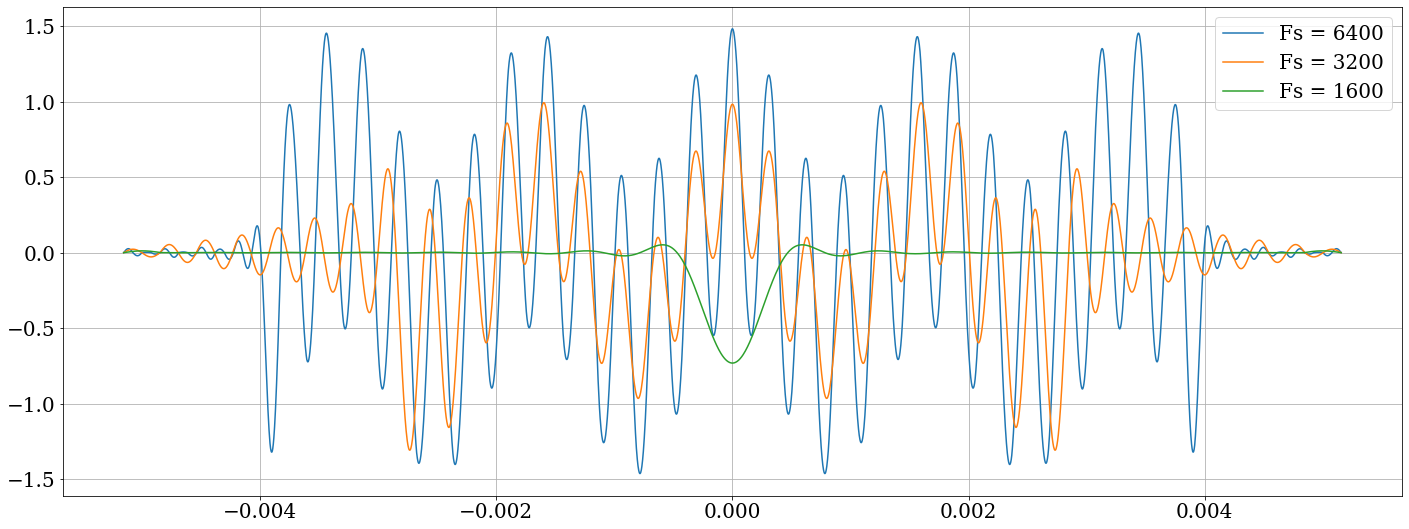

In [6]:
rIncrease = 2 # Range increase
hRange = 16 # Sinc range (in T)
hPoints = 1600 # Sinc points

plt.figure(figsize=(24,9))
plt.rc('font',**font)

for j in range (3):
    Fs = 3200*2 / (2)**j
    tpoints = int(np.floor((tlimits[1]-tlimits[0]) * Fs)) + 1

    increment = int((tlimits[1]-tlimits[0])*(rIncrease/2))
    t1inc = np.linspace(tlimits[0]-increment, tlimits[1]+increment, rIncrease*tpoints)
    x1inc = f(t1inc) # Sampled signal incremented

    th = np.linspace(-hRange*(1/Fs),hRange*(1/Fs),hPoints)
    h = np.sin(np.pi*th*Fs)/(np.pi*th*Fs)

    totpoints = int(hPoints + (rIncrease*tpoints- 2*hRange - 1)*(hPoints)/(2*hRange))
    tr = np.linspace(tlimits[0]-increment, tlimits[1]+increment ,totpoints)
    xi = np.zeros(totpoints)
    xr = np.zeros(totpoints)

    for i in range(rIncrease*tpoints- 2*hRange):
        xi1 = int(i*(hPoints)/(2*hRange))           # Left limit of xi
        xi2 = int(hPoints + i*(hPoints)/(2*hRange)) # Right limit of xi
        #print('xi1={:.2f}, xi2={:.2f}, i={:.2f}, totpoints={:.2f}'.format(xi1,xi2,i,totpoints))
        xi = np.zeros(totpoints)
        xi[xi1:xi2] = x1inc[i+hRange]*h
        xr = xr + xi 

    dFactor = 1 # Decrement factor
    decrement = int(totpoints/2 - totpoints/(2*dFactor))
    x3 = xr[decrement : totpoints-decrement]
    t3 = tr[decrement : totpoints-decrement]
    plt.grid(True)
    plt.plot(t3,x3,label='Fs = {:.0f}'.format(Fs))
    plt.legend()

## Q3

### Sampling

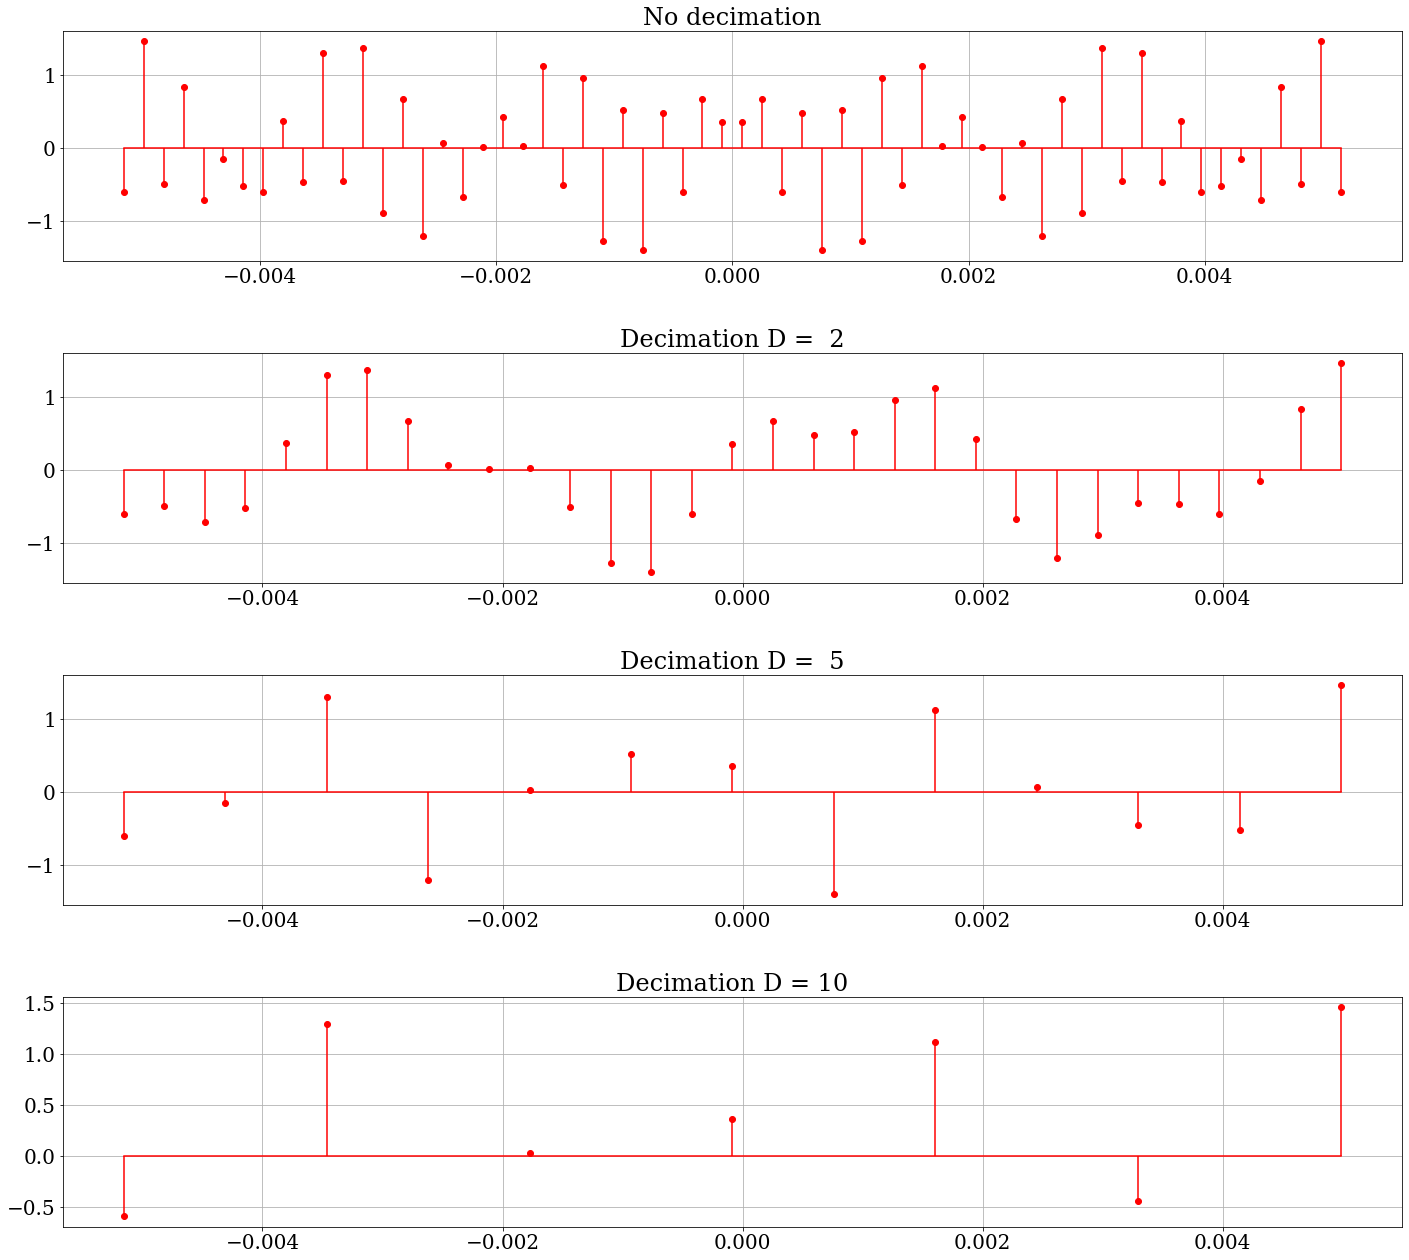

In [7]:
Fs = 6000
tpoints = int(np.floor((tlimits[1]-tlimits[0]) * Fs)) + 1

t1 = np.linspace(tlimits[0],tlimits[1],tpoints)
x1 = f(t1) # Sampled signal

figure,ax = plt.subplots(4, 1,figsize=(24,22))
plt.subplots_adjust(hspace=0.4)
plt.rc('font',**font)

ax[0].grid(True)
ax[0].set_title('No decimation')
markerline, stemline, baseline = ax[0].stem(t1,x1,'red',label = 'Sampling')
baseline.set_color('red')
markerline.set_color('red')

dec_factors = [2,5,10]
for i in range(len(dec_factors)):
    decimate = decimation(list(x1),list(t1),dec_factors[i])
    dx1 = decimate['x']
    dt1 = decimate['t']

    ax[i+1].set_title('Decimation D = {:2.0f}'.format(dec_factors[i]))
    ax[i+1].grid(True)
    markerline, stemline, baseline = ax[i+1].stem(dt1,dx1,'red',label = 'Sampling')
    baseline.set_color('red')
    markerline.set_color('red')

warnings.filterwarnings("ignore")

### Frequency

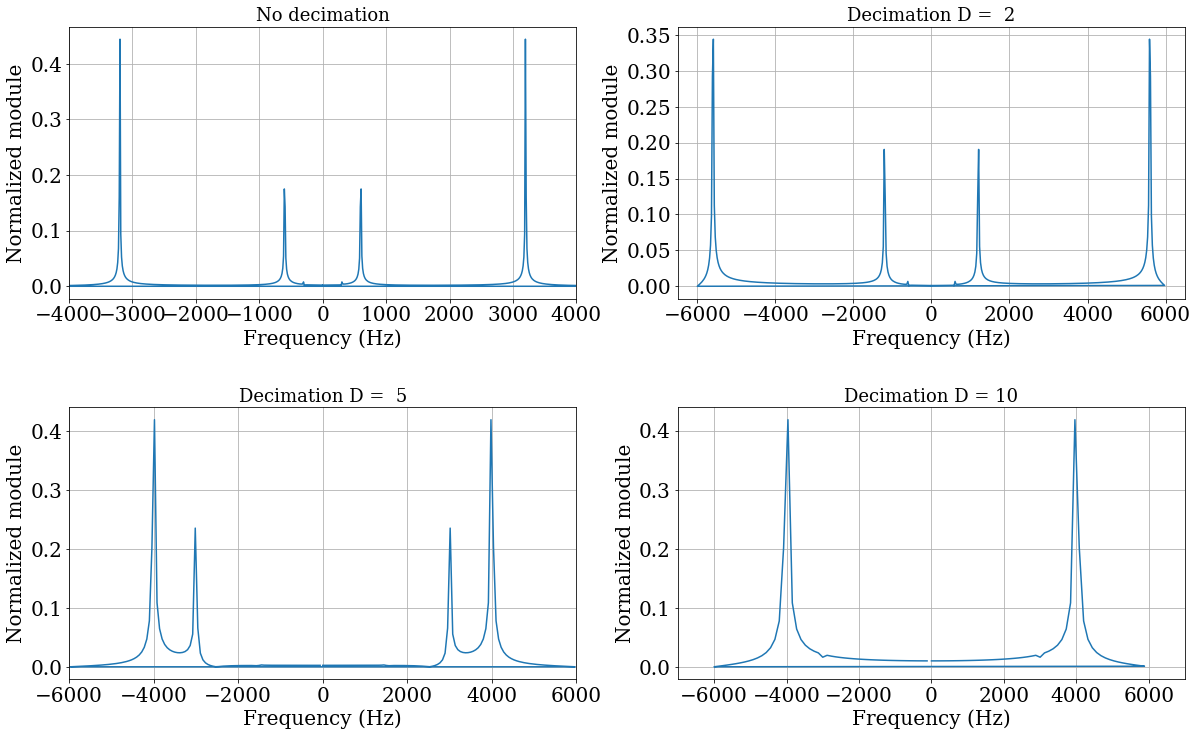

In [8]:
TPFactor = 8 # Time Period factor
FsFactor = 2 # Sampling Frequency factor

LimDiff = (tlimits[1]-tlimits[0])*(TPFactor-1)/2
tlimits3 = [tlimits[0]-LimDiff , tlimits[1]+LimDiff]
Fs3 = FsFactor * Fs
tpoints3 = int(np.floor((tlimits3[1]-tlimits3[0]) * Fs3)) + 1

t3 = np.linspace(tlimits3[0],tlimits3[1],tpoints3)
x3 = f(t3) # Sampled signal

X = np.fft.fft(x3)/tpoints3
Xf = np.fft.fftfreq(tpoints3,1/Fs3)
fig,ax = plt.subplots(2,2,figsize=(20,12))
plt.subplots_adjust(hspace=0.4)
plt.rc('font',**font2)
ax[0][0].grid(True)
ax[0][0].plot(Xf,abs(X))
ax[0][0].set_title('No decimation')
ax[0][0].set_ylabel('Normalized module')
ax[0][0].set_xlabel('Frequency (Hz)')
ax[0][0].set_xlim(-4000,4000)

dec_factors = [2,5,10]
xlims = [[-6500,6500],[-6000,6000],[-7000,7000]]
for i in range(len(dec_factors)):
    decimate = decimation(list(x3),list(t3),dec_factors[i])
    dx3 = decimate['x']
    dt3 = decimate['t']

    win = [int( (i+1)/2 ) , int( (i+1)%2 )] # Window
    ax[win[0]][win[1]].set_title('Decimation D = {:2.0f}'.format(dec_factors[i]))
    ax[win[0]][win[1]].grid(True)

    X3 = np.fft.fft(dx3)/len(dx3)
    X3f = np.fft.fftfreq(len(dx3),1/Fs3)
    ax[win[0]][win[1]].plot(X3f,abs(X3))
    ax[win[0]][win[1]].set_ylabel('Normalized module')
    ax[win[0]][win[1]].set_xlabel('Frequency (Hz)')
    ax[win[0]][win[1]].set_xlim(xlims[i][0],xlims[i][1])

## Q4

### Sampling

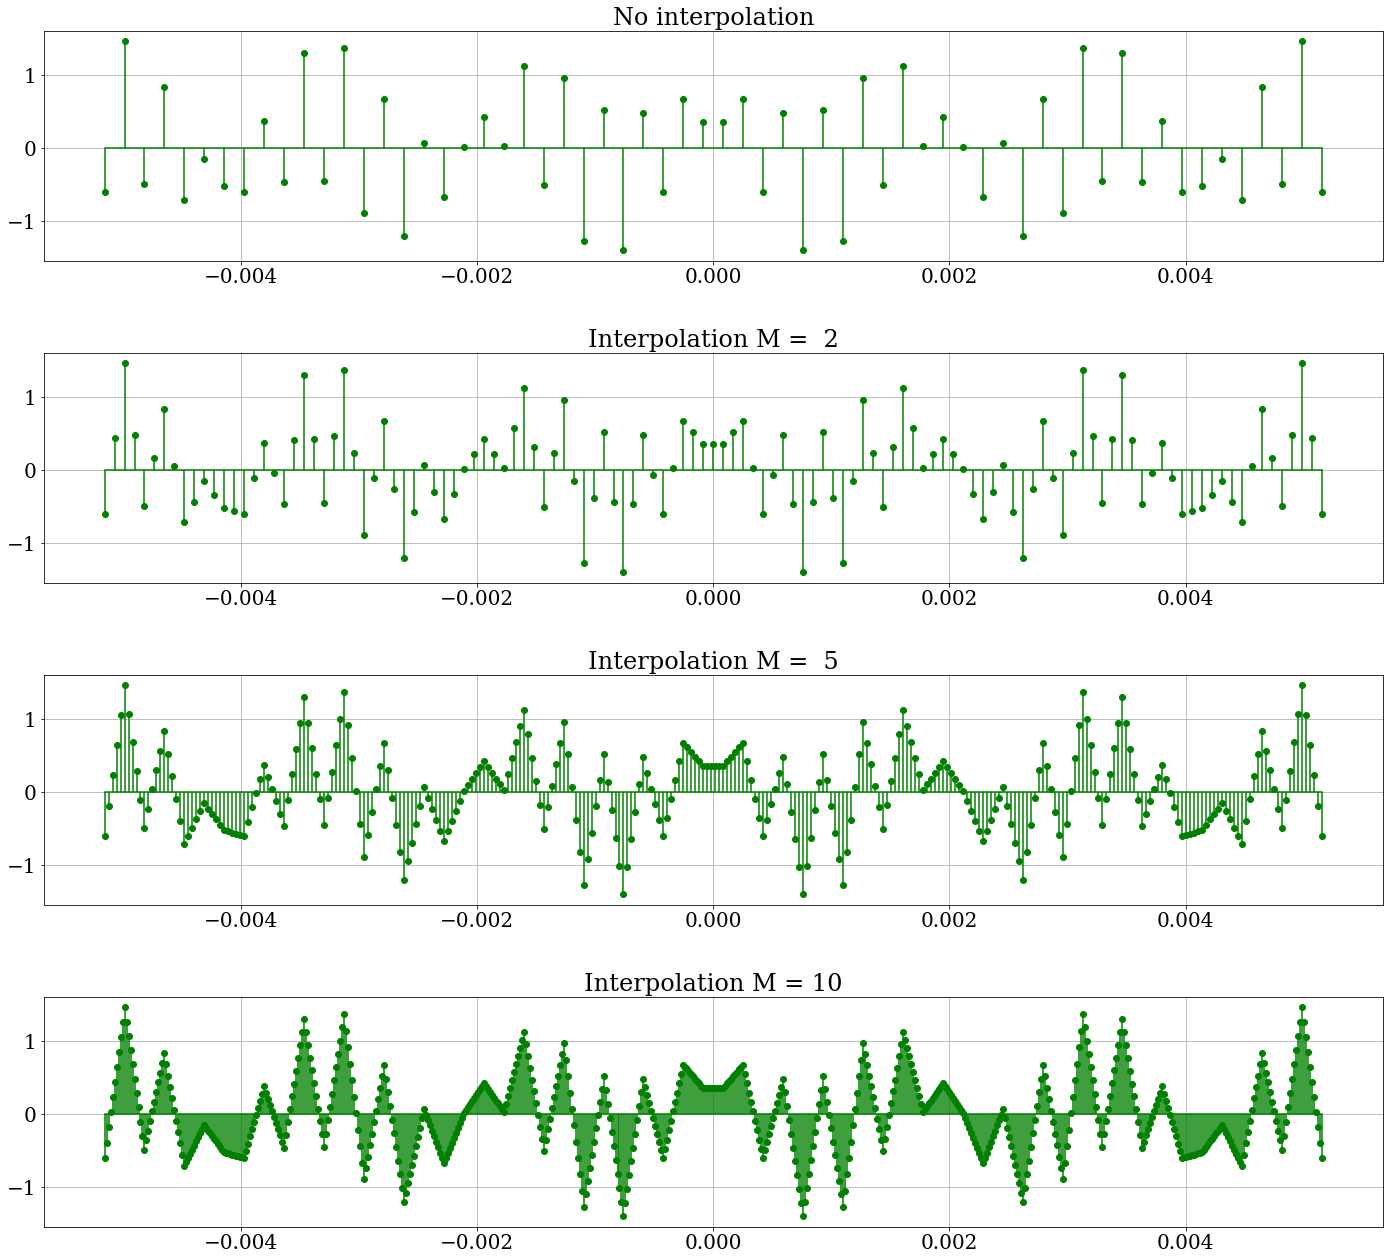

In [21]:
Fs = 6000
tpoints = int(np.floor((tlimits[1]-tlimits[0]) * Fs)) + 1

t1 = np.linspace(tlimits[0],tlimits[1],tpoints)
x1 = f(t1) # Sampled signal

figure,ax = plt.subplots(4, 1,figsize=(24,22))
plt.subplots_adjust(hspace=0.4)
plt.rc('font',**font)

ax[0].grid(True)
ax[0].set_title('No interpolation')
markerline, stemline, baseline = ax[0].stem(t1,x1,'green',label = 'Sampling')
baseline.set_color('green')
markerline.set_color('green')

inter_factors = [2,5,10]
for k in range(len(inter_factors)):
    xHold = list(x1)
    tHold = list(t1)
    for j in range(tpoints-1):
        Linearx1 = np.linspace(x1[j],x1[j+1],inter_factors[k]+1)
        Lineart1 = np.linspace(t1[j],t1[j+1],inter_factors[k]+1)
        for i in range(inter_factors[k]-1):
            xHold.insert(j*inter_factors[k] + i+1, Linearx1[i+1])
            tHold.insert(j*inter_factors[k] + i+1, Lineart1[i+1])

    ax[k+1].grid(True)
    ax[k+1].set_title('Interpolation M = {:2.0f}'.format(inter_factors[k]))
    markerline, stemline, baseline = ax[k+1].stem(tHold,xHold,'green',label = 'Sampling')
    baseline.set_color('green')
    markerline.set_color('green')

### Frequency

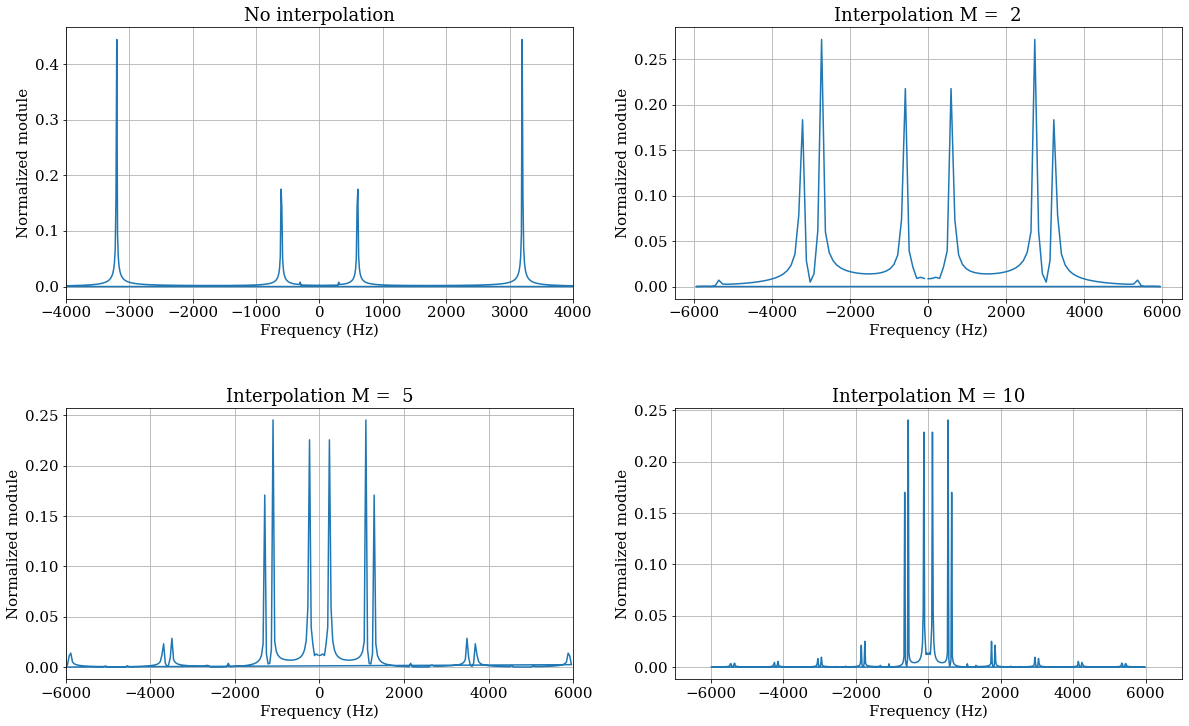

In [29]:
TPFactor = 8 # Time Period factor
FsFactor = 2 # Sampling Frequency factor

LimDiff = (tlimits[1]-tlimits[0])*(TPFactor-1)/2
tlimits4 = [tlimits[0]-LimDiff , tlimits[1]+LimDiff]
Fs4 = FsFactor * Fs
tpoints4 = int(np.floor((tlimits4[1]-tlimits4[0]) * Fs4)) + 1

t4 = np.linspace(tlimits4[0],tlimits4[1],tpoints3)
x4 = f(t4) # Sampled signal

X = np.fft.fft(x4)/tpoints4
Xf = np.fft.fftfreq(tpoints4,1/Fs4)
fig,ax = plt.subplots(2,2,figsize=(20,12))
plt.subplots_adjust(hspace=0.4)
plt.rc('font',**font2)
ax[0][0].grid(True)
ax[0][0].plot(Xf,abs(X))
ax[0][0].set_title('No interpolation')
ax[0][0].set_ylabel('Normalized module')
ax[0][0].set_xlabel('Frequency (Hz)')
ax[0][0].set_xlim(-4000,4000)

xlims = [[-6500,6500],[-6000,6000],[-7000,7000]]
inter_factors = [2,5,10]
for k in range(len(inter_factors)):
    xHold = list(x1)
    tHold = list(t1)
    for j in range(tpoints-1):
        Linearx1 = np.linspace(x1[j],x1[j+1],inter_factors[k]+1)
        Lineart1 = np.linspace(t1[j],t1[j+1],inter_factors[k]+1)
        for i in range(inter_factors[k]-1):
            xHold.insert(j*inter_factors[k] + i+1, Linearx1[i+1])
            tHold.insert(j*inter_factors[k] + i+1, Lineart1[i+1])
    
    X4 = np.fft.fft(xHold)/len(xHold)
    X4f = np.fft.fftfreq(len(xHold),1/Fs4)

    win = [int( (k+1)/2 ) , int( (k+1)%2 )] # Window
    ax[win[0]][win[1]].grid(True)
    ax[win[0]][win[1]].set_title('Interpolation M = {:2.0f}'.format(inter_factors[k]))
    ax[win[0]][win[1]].plot(X4f,abs(X4))
    ax[win[0]][win[1]].set_ylabel('Normalized module')
    ax[win[0]][win[1]].set_xlabel('Frequency (Hz)')
    ax[win[0]][win[1]].set_xlim(xlims[k][0],xlims[k][1])